In [1]:
import firedrake as fd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import hydrogym as gym

mpl.rc("text", usetex=False)
mpl.rc("font", family="serif")
mpl.rc("xtick", labelsize=14)
mpl.rc("ytick", labelsize=14)
mpl.rc("axes", labelsize=20)
mpl.rc("axes", titlesize=20)
mpl.rc("figure", figsize=(6, 4))
%config InlineBackend.figure_format = 'retina'

fd.utils.ScalarType

dtype('float64')

In [2]:
output_dir = "output"
pvd_out = f"{output_dir}/solution.pvd"
restart = "../transient/checkpoint.h5"  # Restart file for unsteady simulation
checkpoint = f"{output_dir}/checkpoint.h5"

# Snapshots used for computing POD modes
snap_file = f"{output_dir}/snapshots.h5"
snap_prefix = f"{output_dir}/snapshots/"

# Snapshots that will be used to compute coefficients for transient wake
transient_file = "../transient/output/snapshots.h5"
transient_prefix = "../transient/output/snapshots/"

# Where the POD modes will end up
pod_file = f"{output_dir}/pod.h5"
pod_prefix = f"{output_dir}/pod"

flow = gym.flow.Cylinder(Re=100, h5_file=restart)

'../transient/checkpoint.h5'

/home/firedrake/firedrake/lib/python3.8/site-packages/matplotlib_inline/config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


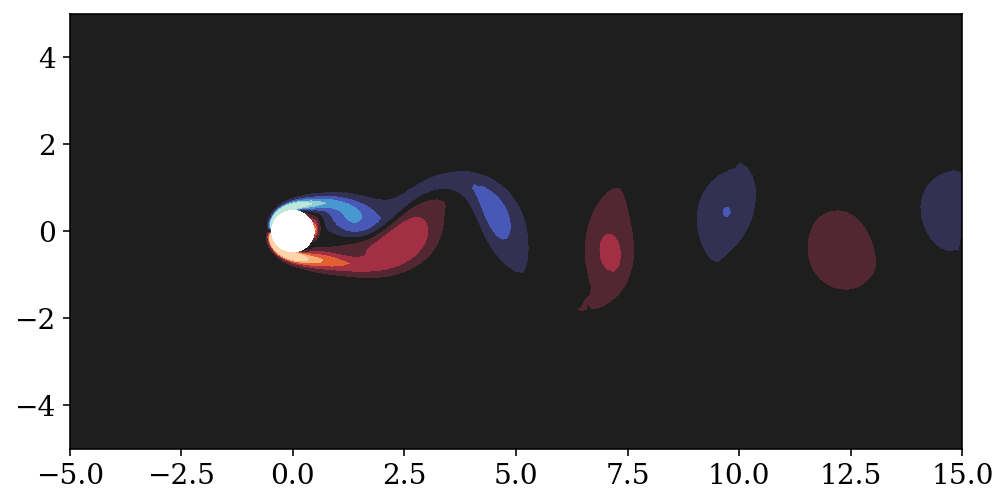

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
levels = np.linspace(-5, 5, 10)
fd.tricontourf(
    flow.vorticity(),
    axes=ax,
    levels=levels,
    extend="both",
    cmap=sns.color_palette("icefire", as_cmap=True),
)
plt.show()

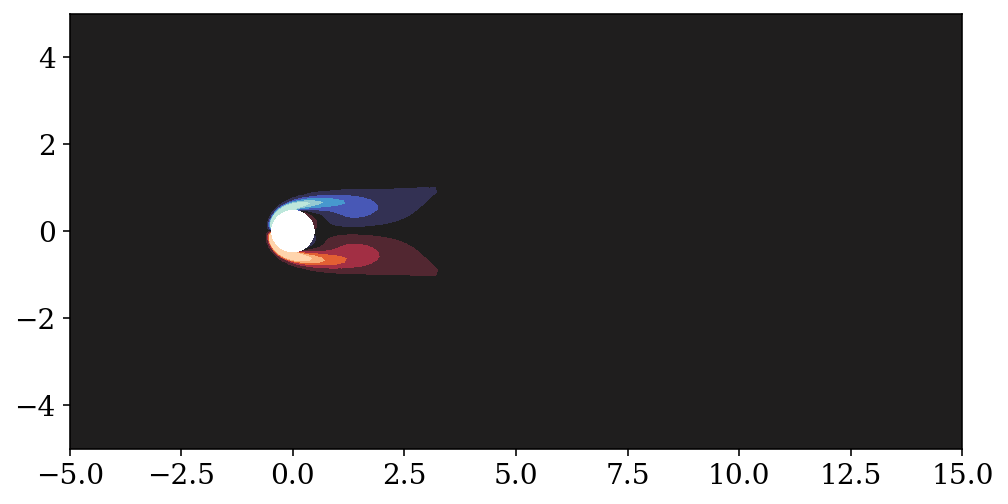

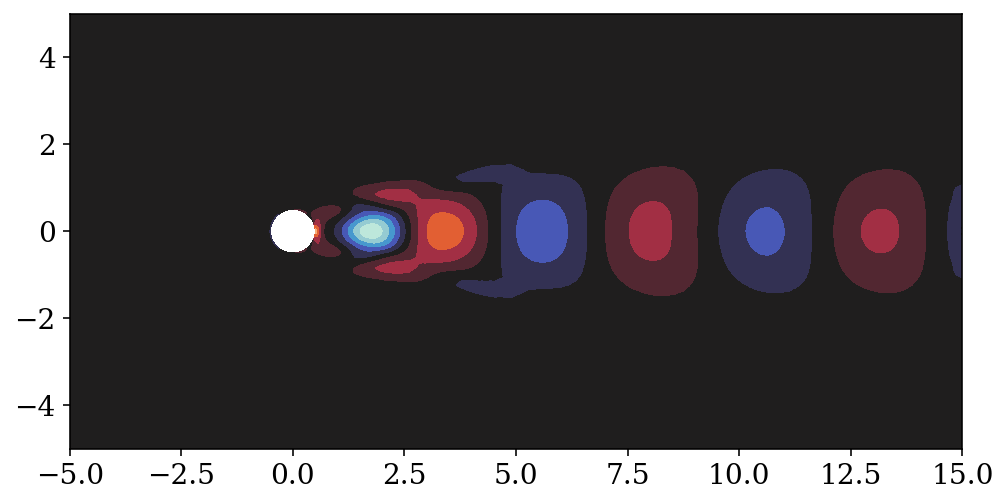

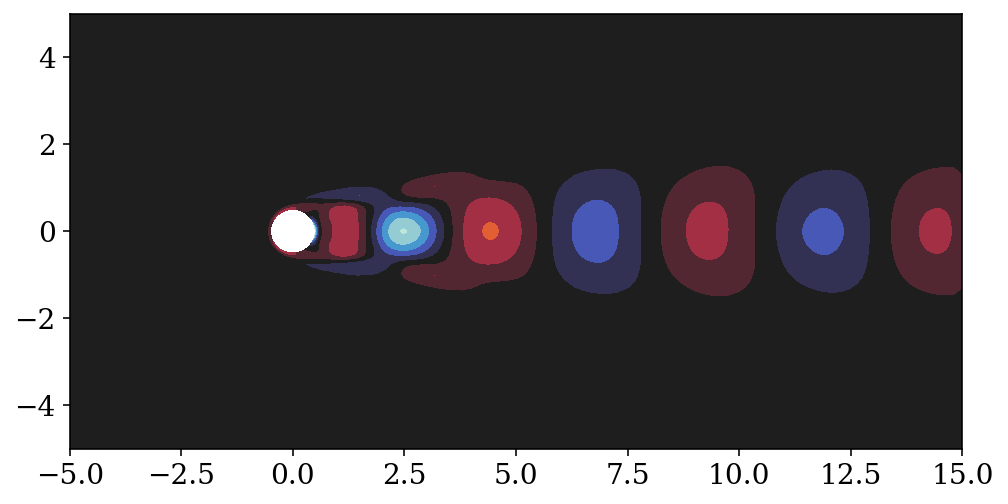

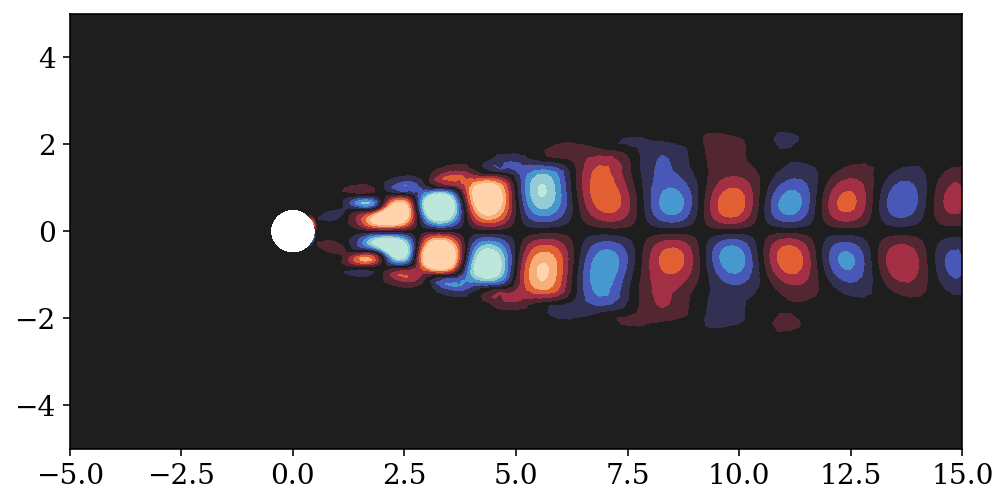

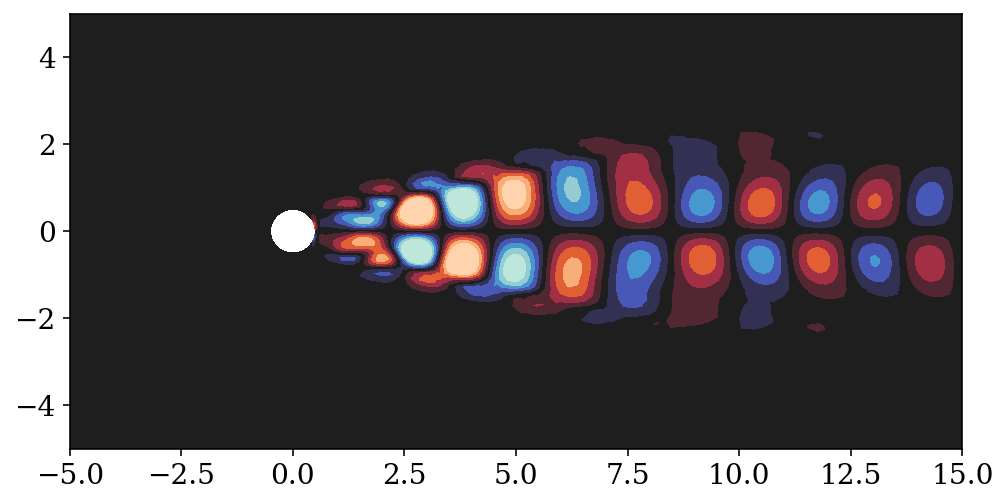

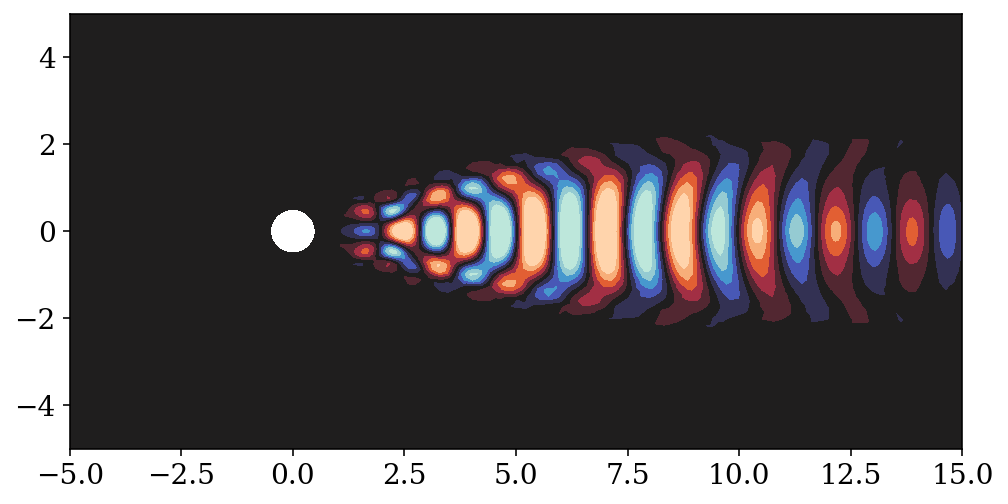

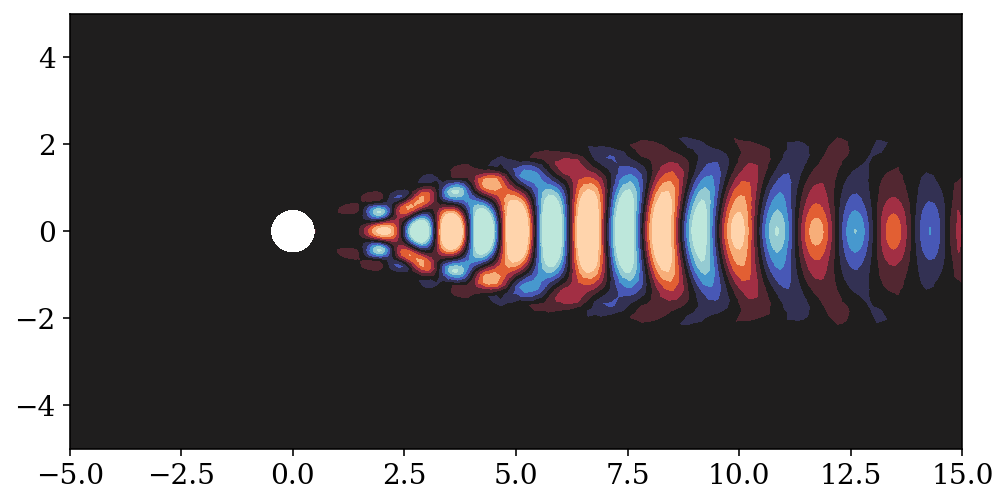

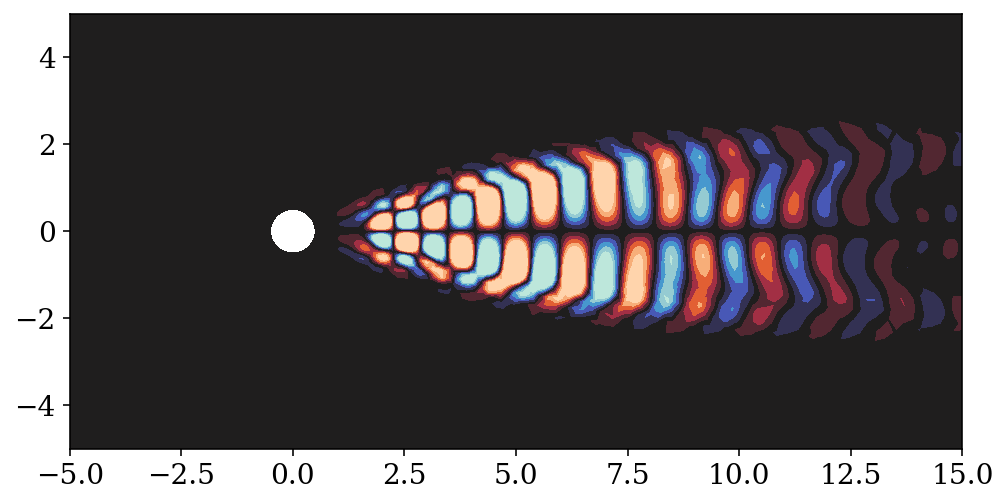

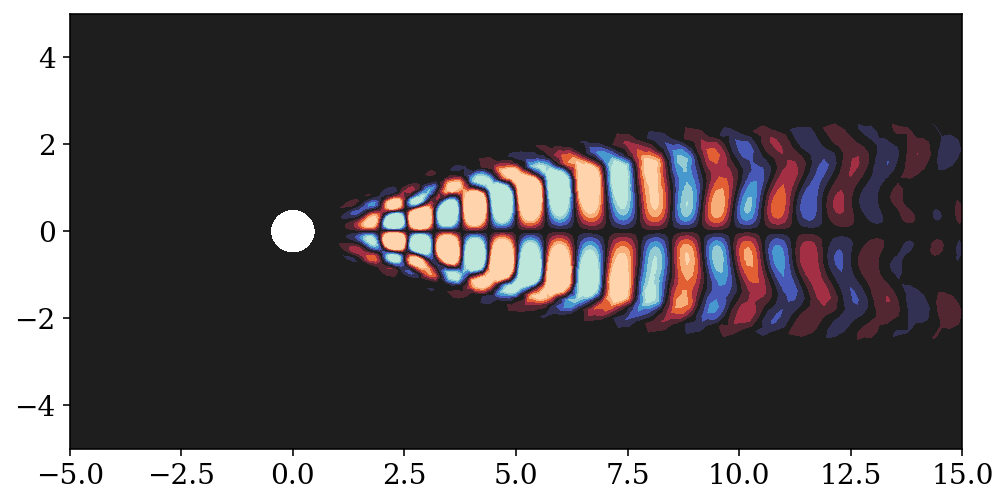

In [8]:
r = 8
mode_path = "output"

gym.utils.set_from_array(flow.q, np.load(f"{mode_path}/mean.npy"))
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
levels = np.linspace(-5, 5, 10)
fd.tricontourf(
    flow.vorticity(),
    axes=ax,
    levels=levels,
    extend="both",
    cmap=sns.color_palette("icefire", as_cmap=True),
)
plt.show()

psi = []
for i in range(r):
    gym.utils.set_from_array(flow.q, np.load(f"{mode_path}/pod{i}.npy"))
    psi.append(flow.q.copy(deepcopy=True))

    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    levels = np.linspace(-1, 1, 10)
    fd.tricontourf(
        flow.vorticity(),
        axes=ax,
        levels=levels,
        extend="both",
        cmap=sns.color_palette("icefire", as_cmap=True),
    )
    plt.show()

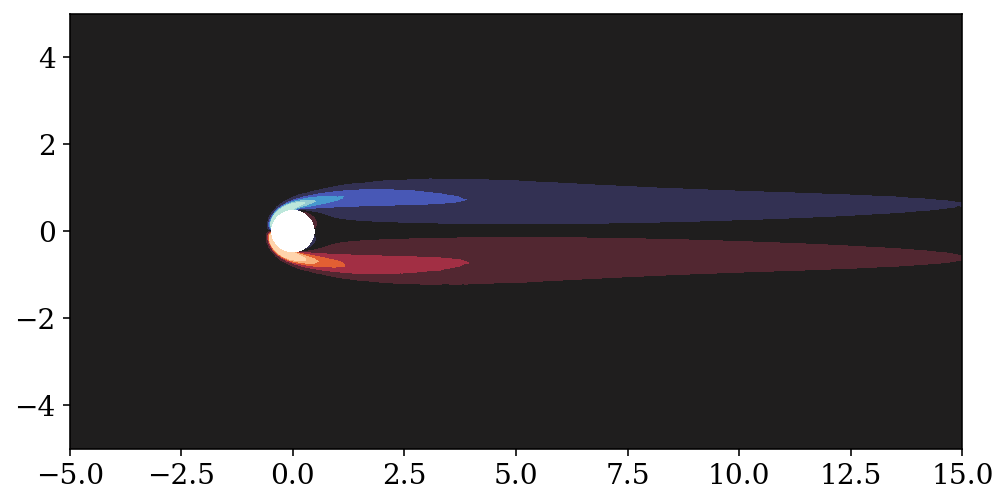

In [30]:
flow.load_checkpoint("transient/output/snapshots.h5", idx=400, read_mesh=True)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
levels = np.linspace(-5, 5, 10)
fd.tricontourf(
    flow.vorticity(),
    axes=ax,
    levels=levels,
    extend="both",
    cmap=sns.color_palette("icefire", as_cmap=True),
)
plt.show()

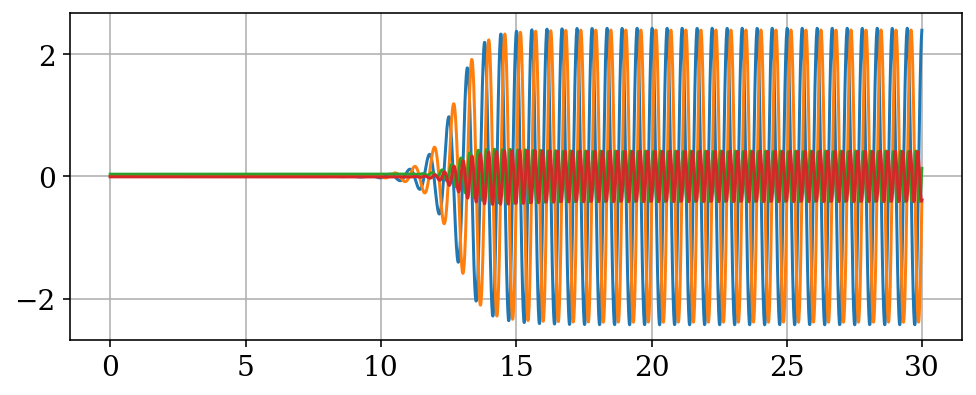

In [22]:
dt = 1e-2
a = np.loadtxt("output/coeffs.dat")
t = dt * np.arange(a.shape[1])

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(t, a[0, :])
ax.plot(t, a[1, :])
ax.plot(t, a[2, :])
ax.plot(t, a[3, :])
ax.grid()

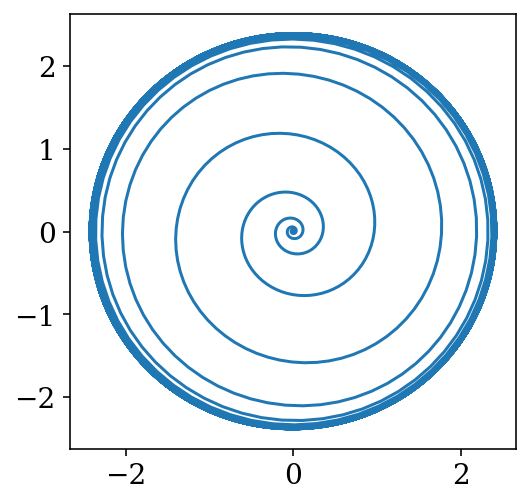

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.plot(a[0, :], a[1, :])